In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

In [59]:
path = r"C:\Users\danie\Desktop\master_project-env\datasets_combined\Downsampled"
derivative = pd.read_parquet(path + "\\ftx_derivative_ticker_downsampled.parquet.gz")
ftx_book = pd.read_parquet(path + '\\ftx_book_snapshot_5_downsampled.parquet.gz')

#new dataframe
model = pd.DataFrame()

#mid price and log return mid price (prediction)
mid_price = (ftx_book['asks[0].price'] + ftx_book['bids[0].price'])/2

#1s return 
model['log_returns(mid_price)'] = np.log1p(mid_price.pct_change())

new = model.join(derivative)
new = new.dropna()
new = new.drop(columns=['funding_timestamp', 'last_price', 'last_price', 'index_price', 'mark_price'])

In [60]:
new.head()

,log_returns(mid_price),funding_rate,open_interest
timestamp,,,
2021-11-19 00:00:07,0.000000,-0.000002,49177.1838
2021-11-19 00:00:08,0.000000,-0.000002,49177.1838
2021-11-19 00:00:09,0.000083,-0.000002,49177.1838
2021-11-19 00:00:10,-0.000081,-0.000002,49177.1838
2021-11-19 00:00:11,-0.000002,-0.000002,49177.1838


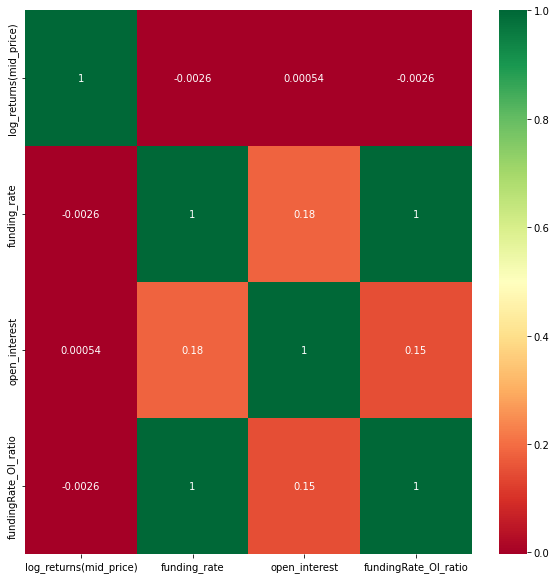

In [68]:
X = new.iloc[:,1:]  #independent columns
y = new.iloc[:,0]    #target column i.e price range
#get correlations of each features in newset

corrmat = new.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(new[top_corr_features].corr(),annot=True,cmap="RdYlGn")

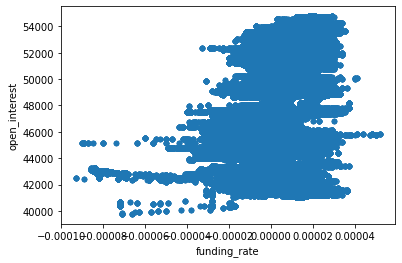

In [67]:
#examine relationship between funding and open interest
new.plot.scatter('funding_rate', 'open_interest')


<AxesSubplot:xlabel='log_returns(mid_price)', ylabel='fundingRate_OI_ratio'>

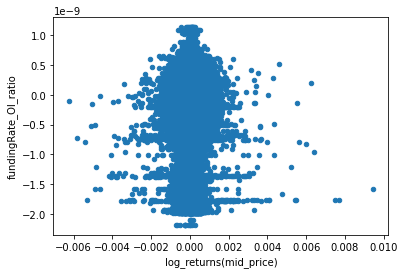

In [70]:
new.plot.scatter('log_returns(mid_price)', 'fundingRate_OI_ratio')